# Linear Regression 


1. Linear regression is one of the easiest and most popular Machine Learning algorithms.
2. It is a statistical method that is used for predictive analysis. Linear regression makes predictions for continuous/real or numeric variables such as sales, salary, age, product price, etc.
3. Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.
4. Mathematically, we can represent a linear regression as:
    y= a0+a1x+ ε
    
5. Here,

i)Y= Dependent Variable (Target Variable)

ii)X= Independent Variable (predictor Variable)

iii)a0= intercept of the line (Gives an additional degree of freedom)

iv)a1 = Linear regression coefficient (scale factor to each input value).

v)ε = random error

The values for x and y variables are training datasets for Linear Regression model representation.

# Types of Linear Regression

Linear regression can be further divided into two types of the algorithm:

1.Simple Linear Regression:
If a single independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Simple Linear Regression.

2.Multiple Linear regression:
If more than one independent variable is used to predict the value of a numerical dependent variable, then such a Linear Regression algorithm is called Multiple Linear Regression.

# Linear Regression Line

A linear line showing the relationship between the dependent and independent variables is called a regression line. A regression line can show two types of relationship:

1. Positive Linear Relationship:
If the dependent variable increases on the Y-axis and independent variable increases on X-axis, then such a relationship is termed as a Positive linear relationship.

2. Negative Linear Relationship:
If the dependent variable decreases on the Y-axis and independent variable increases on the X-axis, then such a relationship is called a negative linear relationship.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat','medv']
df = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)


In [4]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [23]:
df.shape

(506, 14)

df.describe()

Here we seperate the first 13 columns in X and the last column to be predicted as Y.

In [25]:
X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
Y = df['medv']


Splitting the data into training and testing data using train_test_split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42)

Standardizing the data

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Importing and loading the Linear Regression model on the data.

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Printing our predicted values

In [29]:
print(y_pred)

[30.77834822 38.66581541 16.96705276 26.79035818 20.36068008 24.89386356
 18.98948959 15.44554414 24.50205701 22.12455513 27.16709892 20.60218969
 -4.91312377 23.45520373 20.44300739 27.97454642 21.82481134  6.80793603
 43.13876668 19.08804672 28.93737925 31.91943808 12.05148619 25.41493356
 19.60614164 17.23543021 24.61263361 16.907528   24.25623469 20.73183868
 23.98650325 26.66317526 27.45468242 19.57475267 18.15660164 19.94422395
 33.04896681 21.26475982 25.83570427 26.36436267 15.22545112 33.61610719
 45.24385042 18.83620774 28.91584593 18.49470905 14.91054896 27.65199578
 21.75498681 32.36964545 23.36168054 36.5955736  16.82098601 27.59874838
 42.39261672 24.39945725 20.42785358 34.46608842 26.52068304 14.0304141
 24.03170468 32.40960974 33.59067192 17.33583061 22.46180876 18.28308242
 22.01801285 27.57486429 32.54366102 13.95067422 21.96577449 29.21079363
 12.65101384 17.15704754 25.56951945  6.99478235 22.73334313 43.93983367
 20.03571324 10.919632   22.50309934 14.46771561 23.

Root Mean Squared Error:

In [30]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mead squared Error is:")
print(rmse)

Root Mead squared Error is:
4.912717301969202


Training Accuracy:

In [31]:
print("Training accuracy is:")
lr.score(X_train, y_train)

Training accuracy is:


0.7434997532004697

Testing Accuracy:

In [33]:
print("Testing accuracy is:")
lr.score(X_test, y_test)

Testing accuracy is:


0.6761000049033605

# Practical 4 Method 2

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [37]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [38]:
column_names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat','medv']
df = pd.read_csv('./housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [39]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [40]:
x = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = df['medv']

In [41]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [42]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [43]:
df = x 
df["target"] = y
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:>

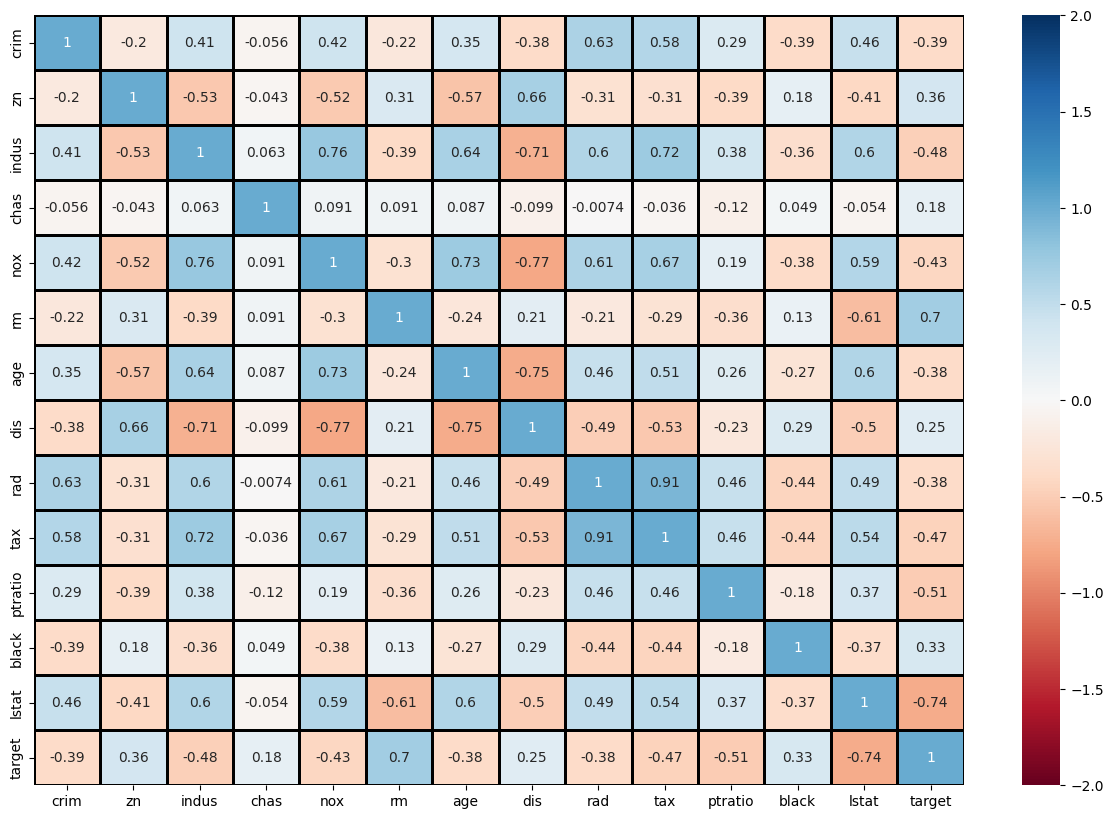

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmax=2, vmin=-2, center=0, cmap="RdBu", linewidth=1, linecolor="black" )

In [45]:
df = df[['rm', 'lstat', 'target']]

In [46]:
df

,rm,lstat,target
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0


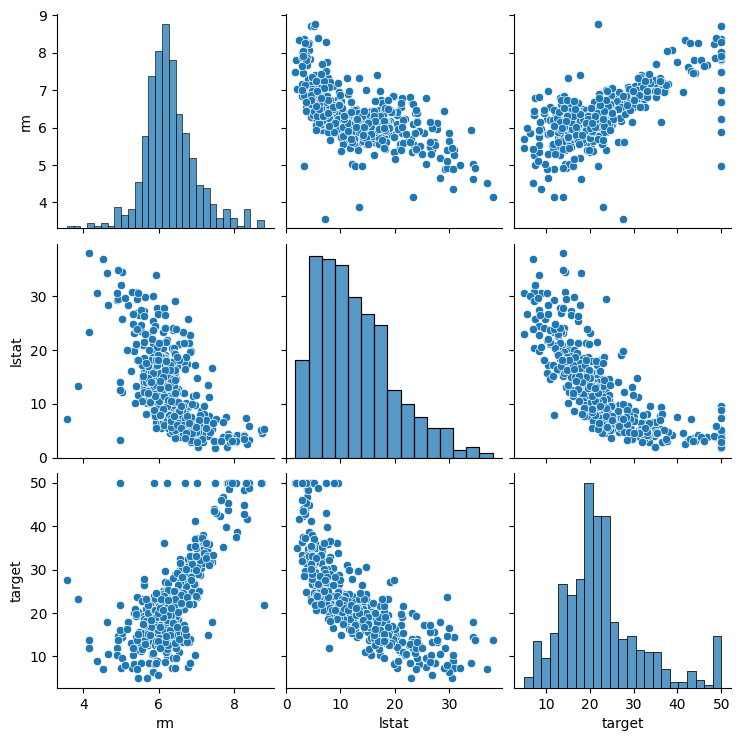

In [47]:
sns.pairplot(df)
plt.show()

In [48]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [49]:
scaler = StandardScaler()

In [50]:
x = scaler.fit_transform(x)

In [51]:
x

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

In [91]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, shuffle=True)

In [92]:
x_train.shape, y_train.shape

((354, 14), (354,))

In [93]:
x_train

array([[ 1.2576777 , -0.48772236,  1.01599907, ..., -3.60929169,
         0.75650904, -1.40757402],
       [-0.41508744,  2.94584308, -1.40317788, ..., -0.02592009,
        -0.56673147,  0.84536177],
       [-0.37252742, -0.48772236, -0.72032214, ...,  0.16891656,
        -0.88212248,  0.98685049],
       ...,
       [-0.38798295, -0.48772236, -0.21109853, ...,  0.44105193,
         0.13133397,  0.2141044 ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41613247,  2.94584308, -1.40317788, ...,  0.38951945,
        -0.8456773 ,  1.31336292]])

In [94]:
model = LinearRegression(n_jobs=-1)

In [95]:
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [96]:
y_pred = model.predict(x_test)
y_pred

array([22.2, 13.3, 13.1, 44. , 28.5, 13.9, 19.7, 20.1, 22.5, 12.8, 30.5,
       10.2, 29.8, 15. , 13.3, 17.5, 22.4,  8.4, 18.4, 43.5, 29. , 29.1,
       22. , 18.9, 31. , 50. , 25.3, 23.1, 24.8, 23.3, 24.3, 19.9, 20. ,
       33. , 21.9, 50. , 45.4, 19.4, 19.5, 22.5, 19.2, 12.6, 15.6, 19.8,
       16. , 50. , 23.2, 43.8, 23.8, 33.4, 12.3, 24.5, 25. , 22.2, 20. ,
       28.7, 50. , 24.1, 13.1, 21.7, 21. , 26.6, 17.2, 23.2, 19.6, 19.4,
       20.8, 21.7, 19.4, 28.1, 13.8,  7. , 19.3, 14.6, 24. , 36.2, 20. ,
       24.5, 22.6, 13.3, 16.2, 24.3, 21.2, 21.8,  8.5, 12.7, 26.5, 24.6,
       25. , 21.2, 23.8, 14.1, 23.7,  8.3, 14.2,  8.7, 30.1, 29.4, 21.4,
       18.8, 13.4, 22.7, 23.9, 19.3, 23.9, 15.3, 14.4, 25. , 17.1, 31.6,
       33.2, 20. , 19.1, 15.2, 11.9, 26.4, 20.4, 33.8, 24.8, 36.4, 20.1,
       13.5, 22.6, 19.7, 22.6, 30.8, 19. , 28.6, 18. , 11.5, 21.1, 17.1,
       12.7, 19.4, 24.3, 15.6, 22. , 21.2, 24.7, 15. , 22.9, 18.6, 13.8,
       13. , 19.5, 21.6, 24.2, 13.1, 20.5, 11.7, 21

In [100]:
mean_squared_error(y_test,y_pred)

6.58460121638228e-27

In [101]:
mean_absolute_error(y_test,y_pred)

6.70925303618213e-14

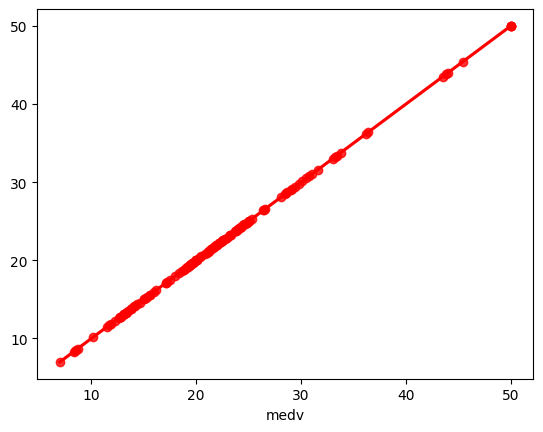

In [106]:
sns.regplot(x=y_test, y=y_pred, color="red")
plt.show()